In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Establece el estilo de los gráficos a 'ggplot'
plt.style.use('ggplot')

In [ ]:
# Carga el archivo CSV en un DataFrame de pandas
file_path = '/muertes&chocolate.csv'
data = pd.read_csv(file_path)

In [ ]:
# Agrupa los datos por país y calcula el consumo promedio de chocolate per cápita,
# luego ordena los valores de forma descendente y selecciona los 10 primeros
top_chocolate_consumers = data.groupby('country')['choc_kg_per_capita'].mean().sort_values(ascending=False).head(10)

In [ ]:
# Agrupa los datos por año y calcula el consumo promedio de chocolate per cápita para cada año
chocolate_consumption_over_years = data.groupby('year')['choc_kg_per_capita'].mean()

In [ ]:
# Agrupa los datos por país y calcula el promedio de consumo de chocolate per cápita
# y el promedio de muertes por Alzheimer y otras demencias
scatter_data = data.groupby('country').agg({
    'choc_kg_per_capita': 'mean',
    'alzheimer_and_dementias_deaths': 'mean'
}).reset_index()

<ipython-input-7-aa4ffdbd5b38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_chocolate_consumers.index, y=top_chocolate_consumers.values, palette='viridis')


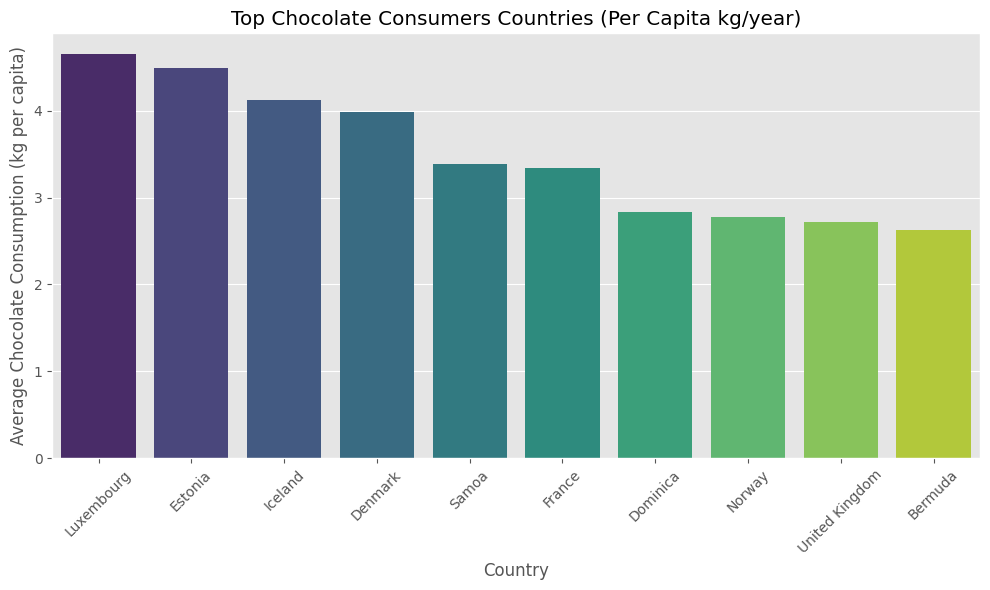

In [ ]:
# Gráfico de barras para mostrar los 10 principales países consumidores de chocolate
plt.figure(figsize=(10, 6))
sns.barplot(x=top_chocolate_consumers.index, y=top_chocolate_consumers.values, palette='viridis')
plt.title('Top Chocolate Consumers Countries (Per Capita kg/year)')
plt.ylabel('Average Chocolate Consumption (kg per capita)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta el diseño para evitar el recorte de etiquetas
plt.show()

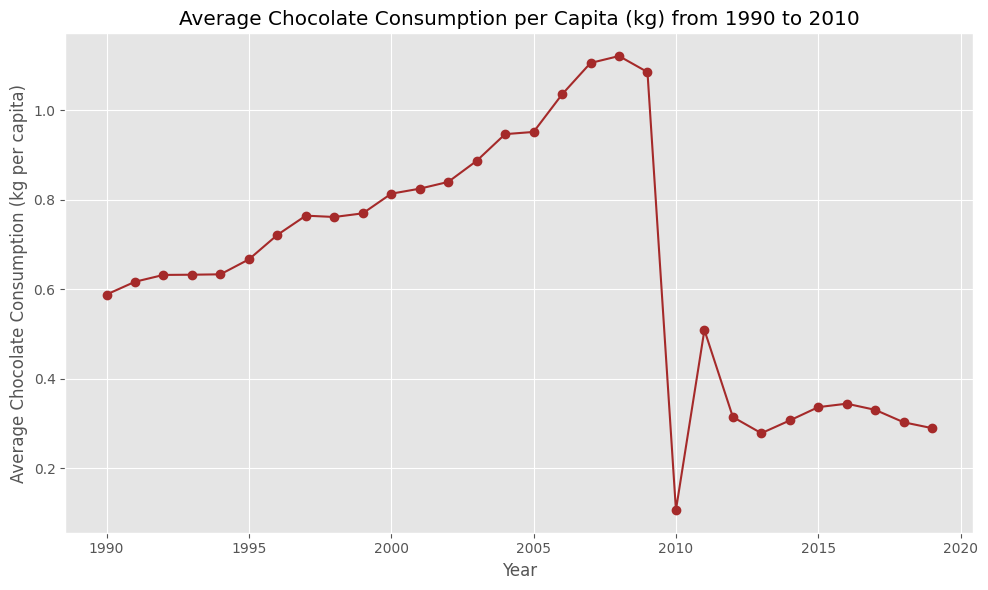

In [ ]:
# Gráfico de línea para mostrar el consumo promedio de chocolate per cápita a lo largo de los años
plt.figure(figsize=(10, 6))
plt.plot(chocolate_consumption_over_years.index, chocolate_consumption_over_years.values, marker='o', color='brown')
plt.title('Average Chocolate Consumption per Capita (kg) from 1990 to 2010')
plt.ylabel('Average Chocolate Consumption (kg per capita)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

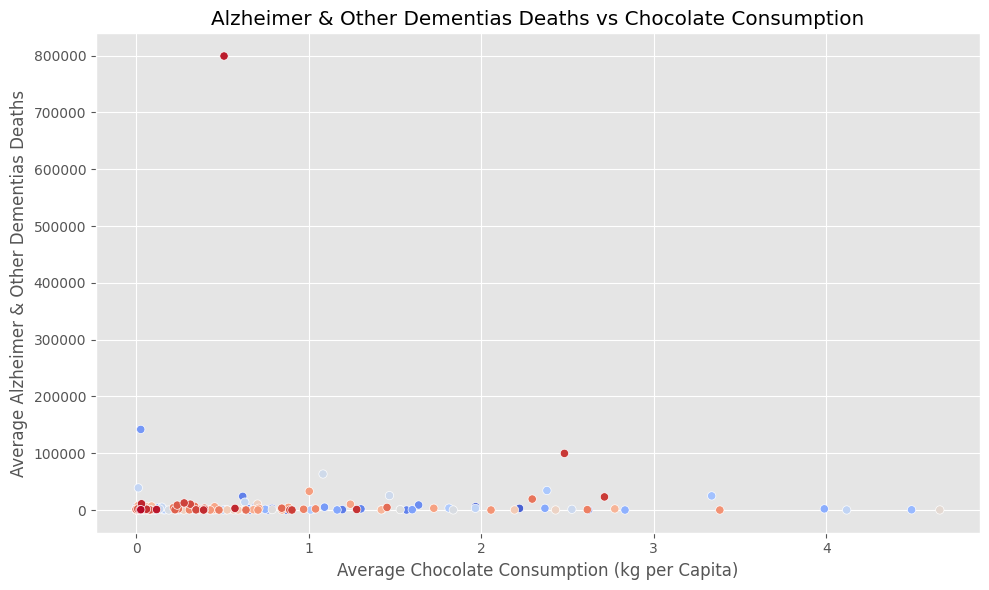

In [ ]:
# Gráfico de dispersión para mostrar la relación entre el consumo de chocolate y las muertes por Alzheimer y otras demencias
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_data, x='choc_kg_per_capita', y='alzheimer_and_dementias_deaths', hue='country', palette='coolwarm', legend=False)
plt.title('Alzheimer & Other Dementias Deaths vs Chocolate Consumption')
plt.ylabel('Average Alzheimer & Other Dementias Deaths')
plt.xlabel('Average Chocolate Consumption (kg per Capita)')
plt.grid(True)
plt.tight_layout()
plt.show()